# [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split


# 
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

sns.set()
%matplotlib inline

Using TensorFlow backend.


# Pré-Processamento
## Carrega o conjunto de treinamento e teste

In [51]:
train = pd.read_csv('dataset/Titanic/train.csv')
test = pd.read_csv('dataset/Titanic/test.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Visualizando meus dados

### Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41f2edf8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f41f0d6b198>]], dtype=object)

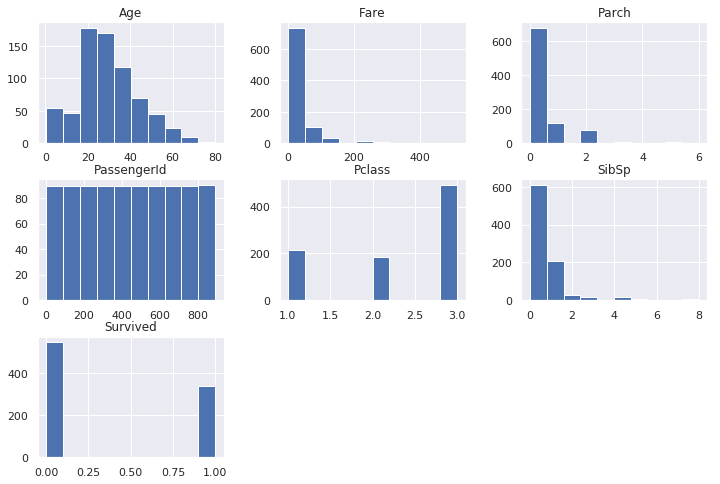

In [3]:
train.hist(figsize=(12, 8))

### Correlação Entre cada Couna

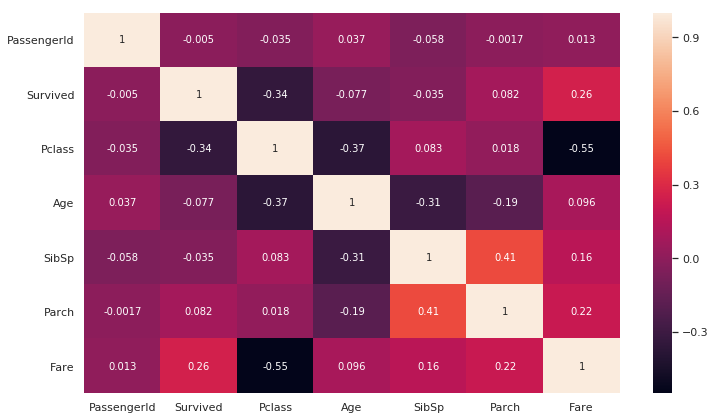

In [4]:
corr = train.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True)

### Boxplot de cada coluna

PassengerId       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Survived       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Pclass         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Age               AxesSubplot(0.125,0.391471;0.227941x0.222059)
SibSp          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Parch          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Fare                 AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

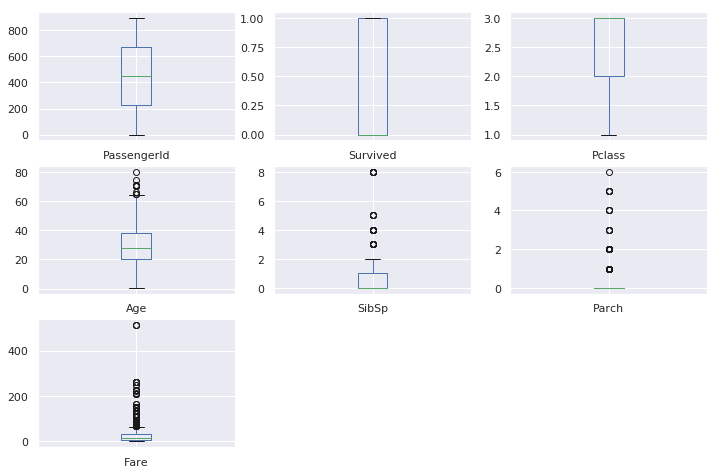

In [5]:
train.plot(kind='box', figsize=(12, 8), subplots=True, layout=(3, 3))

## Deleta as informações irrelevantes

In [52]:
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Visualizando valores nulos
Transforma as colunas de palavras em numeros

In [53]:
new_data_train = pd.get_dummies(train)
new_data_test = pd.get_dummies(test)

Aplica uma correção para os valores nulos - setar  média entre eles

In [54]:
new_data_train['Age'].fillna(new_data_train['Age'].mean(), inplace=True)
new_data_test['Fare'].fillna(new_data_test['Fare'].mean(), inplace=True)

Define o conjunto de features e labels

In [55]:
x = new_data_train.drop('Survived', axis=1)
y = new_data_train['Survived'].values.astype('int32')

x = (x.values).astype('float32')
y = np_utils.to_categorical(y) 

print(x.shape)
print(y.shape)

(891, 11)
(891, 2)


Separa os dados em um conjunto de treinamento e teste

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
# pre-processing: divide by max and substract mean
def pre_process(tensor):
    scale = np.max(tensor)
    mean = np.std(x_train)
    
    tensor /= scale
    tensor -= mean
    
    return tensor

In [49]:
# x_train = pre_process(x_train)
# x_test = pre_process(x_test)

In [57]:
camada_de_entrada = x_train.shape[1]
classes = y_train.shape[1]

print('classes : ',classes,' Camada de Entrada da MLP : ', camada_de_entrada)

classes :  2  Camada de Entrada da MLP :  11


## Definindo o modelo 
### Simple ANN with Keras

In [59]:
def ANN(entrada, nb_classes):
    model = Sequential()
    model.add(Dense(128, input_dim=entrada))
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    return model

ann = ANN(camada_de_entrada, classes)

### Compile the model

In [60]:
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Treinando o modelo

In [61]:
log = ann.fit(x_train, y_train, epochs=10, batch_size=1, validation_split=0.1,  verbose=1)

Train on 640 samples, validate on 72 samples
Epoch 1/10
640/640 [==============================] - 2s 3ms/step - loss: 5.4640 - acc: 0.6219 - val_loss: 7.8764 - val_acc: 0.4722
Epoch 2/10
640/640 [==============================] - 1s 2ms/step - loss: 7.9761 - acc: 0.4875 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 3/10
640/640 [==============================] - 1s 2ms/step - loss: 9.9544 - acc: 0.3609 - val_loss: 7.7805 - val_acc: 0.5000
Epoch 4/10
640/640 [==============================] - 1s 2ms/step - loss: 9.6426 - acc: 0.3859 - val_loss: 7.6054 - val_acc: 0.5139
Epoch 5/10
640/640 [==============================] - 2s 2ms/step - loss: 9.6782 - acc: 0.3859 - val_loss: 7.6593 - val_acc: 0.5139
Epoch 6/10
640/640 [==============================] - 2s 2ms/step - loss: 9.4667 - acc: 0.4000 - val_loss: 6.9597 - val_acc: 0.5417
Epoch 7/10
640/640 [==============================] - 1s 2ms/step - loss: 6.4424 - acc: 0.5953 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 8/10
640/640 [===========

In [62]:
acuracia = ann.evaluate(x_test, y_test)
print(acuracia)

log.history.keys() 

179/179 [==============================] - 0s 166us/step
[6.537471944393392, 0.59217876828582594]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

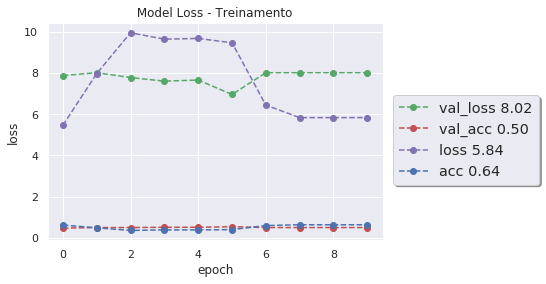

In [63]:
titulo = " Model Loss - Treinamento "

plt.plot(log.history['val_loss'], '--go', label='val_loss %.2f' %(log.history['val_loss'][len(log.history['val_loss'])-1]))
plt.plot(log.history['val_acc'], '--ro', label='val_acc %.2f ' %(log.history['val_acc'][len(log.history['val_acc'])-1]))

plt.plot(log.history['loss'], '--mo', label='loss %.2f ' %(log.history['loss'][len(log.history['loss'])-1]))
plt.plot(log.history['acc'], '--bo', label='acc %.2f ' %(log.history['acc'][len(log.history['acc'])-1]))

plt.title(titulo)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper center', shadow=True, fontsize='x-large',  bbox_to_anchor=(1.25, 0.7), ncol=1)

### Gerando predições do teste

In [64]:
preds = ann.predict_classes(x_test, verbose=1)

179/179 [==============================] - 0s 617us/step


<class 'numpy.ndarray'> 179


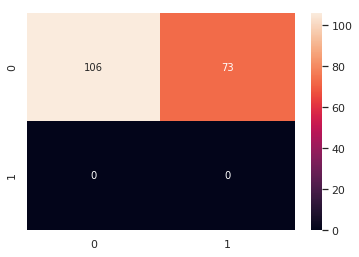

In [65]:

correto = []

for i in range(len(y_test)):
    correto.append(np.argmax(y_test[i]))


print(type(preds),len(correto))

# plot the confusion matrix
# sns.set(font_scale=1.5)
cm = confusion_matrix(preds, correto)
sns.heatmap(cm, annot=True, fmt='g')

## Referências
 * [Simple Deep MLP with Keras](https://www.kaggle.com/fchollet/simple-deep-mlp-with-keras)
 * [ANN to classifier Voice](https://www.kaggle.com/siddu1998/artificial-neural-network-to-classify-voice)
 * [Prima Indians Diabetes](https://www.kaggle.com/surya635/pima-indians-diabetes)